In this blog post, we will demonstrate how to perform Value at Risk (VaR) calculations using the historical method for a portfolio of stocks. We’ll use Python and the yfinance library to download historical stock price data and then calculate VaR for an equally weighted portfolio.

# Setting Time Range and Tickers

First, let’s set the time range to a certain number of years and create a list of tickers we want to analyze. In this example, we’ll analyze the past 15 years of stock data.

In [18]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# Downloading Adjusted Close Prices

Next, we will download the daily adjusted close prices for each ticker in our list using the yfinance library.

In [11]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2008-10-06   78.371620  48.870605   84.279999   30.494034   39.873894
2008-10-07   74.861649  49.013279   87.269997   28.560818   37.439697
2008-10-08   72.975700  48.287144   89.419998   28.333378   36.723766
2008-10-09   67.879158  46.783028   89.900002   27.572348   34.417683
2008-10-10   66.232697  45.356712   83.220001   27.397390   33.422920
...                ...        ...         ...         ...         ...
2023-09-25  432.230011  69.949997  177.699997  359.609985  214.500000
2023-09-26  425.880005  6

# Calculating Daily Log Returns and Dropping NAs
Once we have the adjusted close prices, we can calculate the daily log returns for each stock and drop any NAs from the resulting DataFrame.

In [12]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2008-10-07 -0.045820  0.002915  0.034862 -0.065495 -0.062990
2008-10-08 -0.025515 -0.014926  0.024338 -0.007995 -0.019307
2008-10-09 -0.072397 -0.031645  0.005354 -0.027227 -0.064854
2008-10-10 -0.024555 -0.030962 -0.077210 -0.006366 -0.029329
2008-10-13  0.135578  0.040753 -0.014890  0.114799  0.120710
...              ...       ...       ...       ...       ...
2023-09-25  0.004196 -0.007406 -0.005164  0.004739  0.004017
2023-09-26 -0.014800 -0.001001 -0.008023 -0.015130 -0.014510
2023-09-27  0.000399 -0.003584 -0.012444  0.002341  0.001040
2023-09-28  0.005781  0.002582 -0.005010  0.008330  0.006594
2023-09-29 -0.002430 -0.000430 -0.010329  0.000726 -0.002915

[3771 rows x 5 columns]


# Creating an Equally Weighted Portfolio
Now, we’ll create an equally weighted portfolio with a total value of $1,000,000.

In [13]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


# Calculating Historical Portfolio Returns
With the weights defined, we can now calculate the historical portfolio returns.

In [14]:
historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2008-10-07   -0.027306
2008-10-08   -0.008681
2008-10-09   -0.038154
2008-10-10   -0.033684
2008-10-13    0.079390
                ...   
2023-09-25    0.000076
2023-09-26   -0.010693
2023-09-27   -0.002450
2023-09-28    0.003655
2023-09-29   -0.003075
Length: 3771, dtype: float64


# Finding X-Day Historical Returns
Next, we’ll find the X-day historical returns. In this example, we’ll use a 50-day window.

In [28]:
days = 50

# Moving average 50 days
range_returns = historical_returns.rolling(window = days).sum() 
# Drop NA 50 head rows
range_returns = range_returns.dropna()
print(range_returns)

Date
2008-12-16   -0.076145
2008-12-17   -0.052350
2008-12-18   -0.056758
2008-12-19   -0.022277
2008-12-22    0.005315
                ...   
2023-09-25   -0.035603
2023-09-26   -0.049970
2023-09-27   -0.059642
2023-09-28   -0.057404
2023-09-29   -0.051084
Length: 3722, dtype: float64


# Calculating VaR Using the Historical Method
Now, we can specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.

In [29]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value # Portfolio value = $1,000,000 

print("VaR of the portfolio is",round(VaR,2))

VaR of the portfolio is 56745.32


# Plotting the Results of the Historical Returns
Finally, let’s plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.

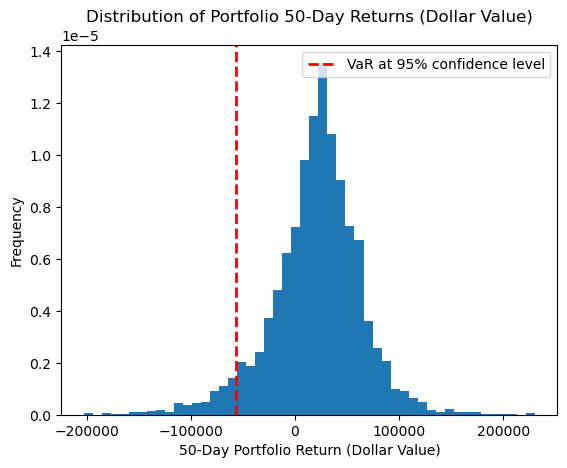

In [30]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()

By following these steps, you can create a Python script that calculates the Value at Risk (VaR) using the historical method for your investment portfolio. Keep in mind that this approach is based on historical returns, which may not be a reliable indicator of future performance. Continuously refining your analysis and considering other factors will help you develop a more accurate understanding of the risks associated with your investments, enabling you to make more informed decisions.

In conclusion, the historical method for calculating Value at Risk (VaR) provides a simple and intuitive way to estimate the potential losses in your investment portfolio. However, it is essential to remember that historical returns do not guarantee future performance, and relying solely on this method may lead to inaccurate risk assessments.

To develop a more comprehensive understanding of your portfolio’s risk, consider incorporating other risk management techniques such as Monte Carlo simulations, stress testing, and scenario analysis. By combining different approaches, you can create a more well-rounded risk management strategy that accounts for various market conditions and potential events. This holistic approach will enable you to make more informed investment decisions and better manage the potential risks and rewards associated with your investments.